In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import *
from sklearn.gaussian_process import GaussianProcessRegressor
data = pd.read_csv('/Users/chengnanxu/Desktop/Gaussian Process/Gaussian Process_cross validation/project_dataset.csv')

In [11]:
define = {
    '89':1,
    '90':2,
    '91':3,
    '92':4,
    '93':5,
    '94':6,
    '95':7,
    '96':8,
    '97':9,
    '98':10,
    '99':11,
    '00':12,
    '01':13,
    '02':14,
    '03':15,
    '04':16,
    '05':17,
    '06':18,
    '07':19,
    '08':20,
    '09':21,
    '10':22,
    '11':23,
    '12':24,
    '13':25,
    '14':26,
    '15':27,
    '16':28,
    '17':29,
    '18':30,
    '19':31,
}
data['year_no'] = data['Years'].apply(lambda x:str(x)[2:4])
data['year_level'] = data['year_no'].map(define)

cols = ['year_level','Month Level','Production','Consumption','Previous Month Prices','Events']

In [12]:
x_train = data.loc[0:270,cols]
y_train = data.loc[0:270,'Prices']

x_test = data.loc[271:,cols]
y_test = data.loc[271:,'Prices']

In [13]:
scaler = MinMaxScaler()
print(scaler.fit(x_train))
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [14]:
kernel= ConstantKernel(0.2, (0.01, 10.0)) * (DotProduct(sigma_0=2.0, sigma_0_bounds=(0.1, 10.0)) ** 2)
gpr=GaussianProcessRegressor(kernel=kernel)
gpr.fit(x_train,y_train)
y_predict,y_std=gpr.predict(x_test, return_std=True)
print(gpr)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=0.447**2 * DotProduct(sigma_0=2) ** 2,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)


/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.22683392e+08,  1.17125939e+09]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Text(0,0.5,'Price')

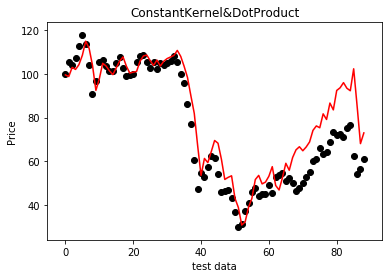

In [15]:
plt.figure()
plt.title('ConstantKernel&DotProduct')
plt.fill_between(np.arange(len(x_test)), y_predict - y_std, y_predict + y_std, alpha=0.2, color='pink',
               )
plt.plot(np.arange(len(x_test)), y_predict, color= 'red', label= 'RBF model')
plt.scatter(np.arange(len(x_test)), y_test, color= 'black', label= 'Data')
plt.xlabel('test data')
plt.ylabel('Price')

In [165]:
mse=[]
for a,b in zip(y_predict,y_test):
    print(a,b)
    mse.append(np.square(y_predict-y_test))

print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

r2=r2_score(y_test, y_predict)
print('>>> The model"s r2 is %5f'%(r2))

99.529541015625 99.85
98.790283203125 105.41
102.975341796875 104.23
102.039794921875 107.07
104.22802734375 112.69
108.48046875 117.79
114.98193359375 113.67
111.711669921875 104.09
103.88330078125 90.73
92.436279296875 96.75
97.670654296875 105.27
104.865234375 106.28
103.62158203125 103.41
101.401123046875 101.17
99.648193359375 101.19
102.74560546875 105.1
105.816162109375 107.64
107.78515625 102.52
103.480712890625 98.85
100.354736328125 99.37
100.804931640625 99.74
101.118408203125 105.26
105.784912109375 108.16
108.19287109375 108.76
108.642578125 105.43
106.07470703125 102.63
103.883056640625 105.48
106.3134765625 102.1
103.56689453125 104.83
105.78955078125 104.04
107.013671875 104.87
107.736083984375 105.71
108.4609375 108.37
110.746826171875 105.23
108.044921875 100.05
103.51513671875 95.85
98.380126953125 86.08
90.007568359375 76.99
81.922119140625 60.7
67.103271484375 47.11
53.4521484375 54.79
61.24609375 52.83
59.325927734375 57.54
64.3046875 62.51
69.479736328125 61.31
6